<a href="https://colab.research.google.com/github/spectregilgamesh078/faiz-nilza/blob/main/Geopandas%20Project%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
gdf = gpd.read_file('/ne_10m_admin_0_countries.shp')

In [ ]:
gdf.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [ ]:
gdf.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Ubah ke proyeksi yang sesuai untuk perhitungan luas (contoh: Equal Area)
gdf_area = gdf.to_crs(epsg=6933)  # Proyeksi Equal Area
gdf['area_km2'] = gdf_area.geometry.area / 10**6  # Luas dalam km²
print("\nLuas Negara (km²):")
print(gdf[['NAME', 'area_km2']].sort_values(by='area_km2', ascending=False))


Luas Negara (km²):
                         NAME      area_km2
47                     Russia  1.698019e+07
175                Antarctica  1.235823e+07
155                    Canada  9.945628e+06
154  United States of America  9.464216e+06
9                       China  9.375215e+06
..                        ...           ...
256           Serranilla Bank  1.052888e-01
257          Scarborough Reef  9.778589e-02
255           Bajo Nuevo Bank  3.586380e-02
250             Coral Sea Is.  2.073228e-02
167                   Vatican  1.220383e-02

[258 rows x 2 columns]


In [ ]:
asia_gdf = gdf[gdf['CONTINENT'] == 'Asia']
print(asia_gdf[['NAME', 'POP_EST', 'geometry']])

                        NAME       POP_EST  \
0                  Indonesia  2.706256e+08   
1                   Malaysia  3.194978e+07   
6                   Dhekelia  7.850000e+03   
7                     Cyprus  1.198575e+06   
8                      India  1.366418e+09   
9                      China  1.397715e+09   
10                    Israel  9.053300e+06   
11                 Palestine  4.685306e+06   
12                   Lebanon  6.855713e+06   
19                     Syria  1.707014e+07   
24               South Korea  5.170910e+07   
25               North Korea  2.566616e+07   
32                    Bhutan  7.630920e+05   
39                      Oman  4.974986e+06   
40                Uzbekistan  3.358065e+07   
41                Kazakhstan  1.851393e+07   
42                Tajikistan  9.321018e+06   
46                  Mongolia  3.225167e+06   
55                   Vietnam  9.646211e+07   
56                  Cambodia  1.648654e+07   
58      United Arab Emirates  9.77

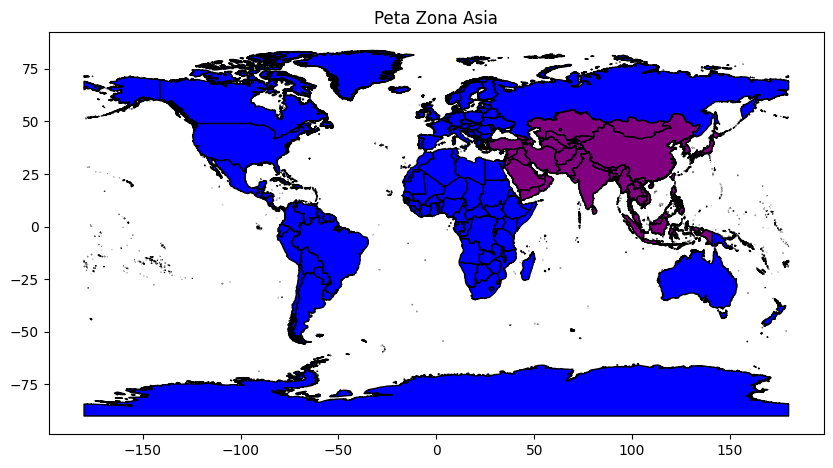

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
gdf.plot(ax=ax, color='blue', edgecolor='black')
asia_gdf.plot(ax=ax, color='purple', edgecolor='black')
plt.title("Peta Zona Asia")
plt.show()

In [ ]:
asia_gdf.to_file("Benua Asia.shp")
print("Peta Benua Asia sudah disimpan")

Peta Benua Asia sudah disimpan


/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 270625568 of field POP_EST of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1366417754 of field POP_EST of feature 4 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1397715000 of field POP_EST of feature 5 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 216565318 of field POP_EST of feature 31 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 163046161 of field POP_

In [ ]:
europe_gdf = gdf[gdf['CONTINENT'] == 'Europe']
print("Database Benua Eropa : ")
print(europe_gdf[['NAME', 'POP_EST', 'geometry']])

Database Benua Eropa : 
                 NAME      POP_EST  \
21             France   67059887.0   
33            Ukraine   44385155.0   
34            Belarus    9466856.0   
43          Lithuania    2786844.0   
47             Russia  144373535.0   
48            Czechia   10669709.0   
49            Germany   83132799.0   
50            Estonia    1326590.0   
51             Latvia    1912789.0   
52             Norway    5347896.0   
53             Sweden   10285453.0   
54            Finland    5520314.0   
57         Luxembourg     619896.0   
59            Belgium   11484055.0   
61    North Macedonia    2083459.0   
62            Albania    2854191.0   
64             Kosovo    1794248.0   
66              Spain   47076781.0   
70            Denmark    5818553.0   
73            Romania   19356544.0   
74            Hungary    9769949.0   
75           Slovakia    5454073.0   
76             Poland   37970874.0   
77            Ireland    4941444.0   
78     United Kingdom   66

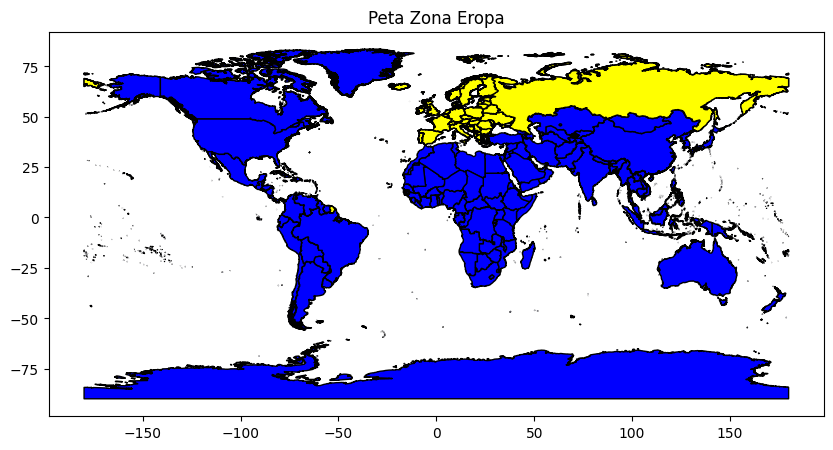

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
gdf.plot(ax=ax, color='blue', edgecolor='black')
europe_gdf.plot(ax=ax, color='yellow', edgecolor='black')
plt.title("Peta Zona Eropa")
plt.show()

In [ ]:
europe_gdf.to_file("Benua Eropa.shp")
print("Peta Benua Eropa sudah disimpan")

Peta Benua Eropa sudah disimpan


/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 144373535 of field POP_EST of feature 4 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(


In [ ]:
big_pop_gdf = gdf[gdf['POP_EST'] < 10000000]
print("Negara dengan Populasi di bawah 10 Juta : ", big_pop_gdf)

Negara dengan Populasi di bawah 10 Juta :            featurecla  scalerank  LABELRANK                    SOVEREIGNT  \
6    Admin-0 country          3          3                United Kingdom   
7    Admin-0 country          1          5                        Cyprus   
10   Admin-0 country          0          4                        Israel   
11   Admin-0 country          0          5                        Israel   
12   Admin-0 country          0          5                       Lebanon   
..               ...        ...        ...                           ...   
253  Admin-0 country          0          4                         China   
254  Admin-0 country          6          5                     Australia   
255  Admin-0 country          6          8  Bajo Nuevo Bank (Petrel Is.)   
256  Admin-0 country          6          5               Serranilla Bank   
257  Admin-0 country          6          6              Scarborough Reef   

    SOV_A3  ADM0_DIF  LEVEL               TY

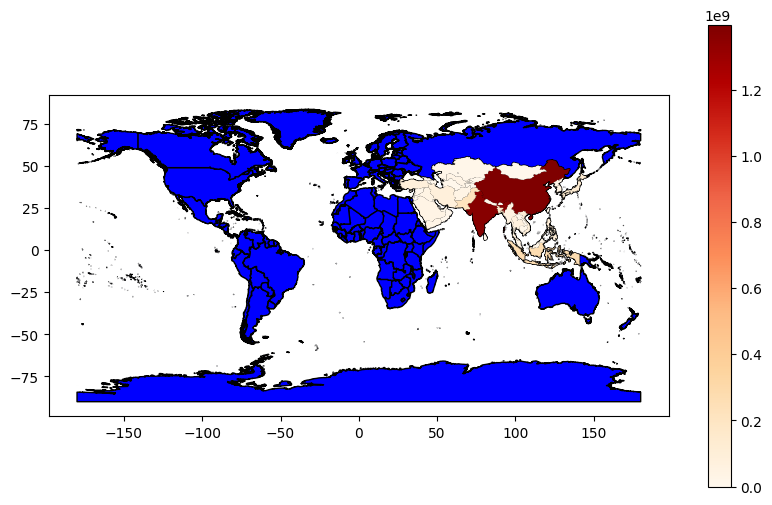

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
gdf.plot(ax=ax, color='blue', edgecolor='black')
asia_gdf.plot(column='POP_EST', cmap='OrRd', legend=True, ax=ax)
plt.show()

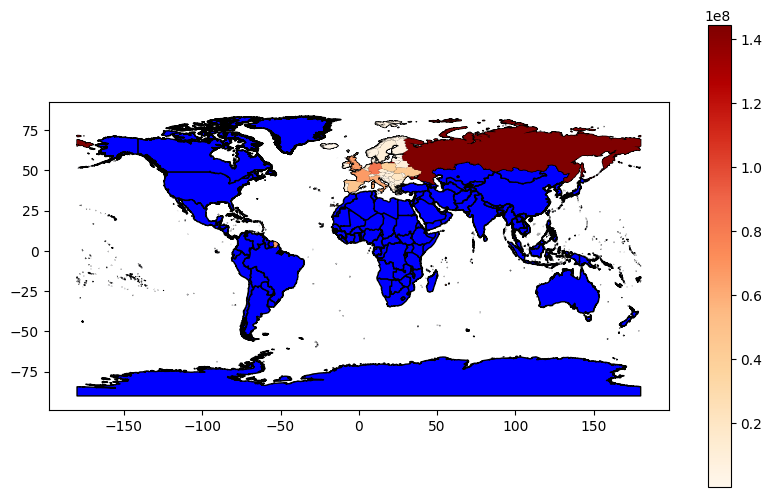

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
gdf.plot(ax=ax, color='blue', edgecolor='black')
europe_gdf.plot(column='POP_EST', cmap='OrRd', legend=True, ax=ax)
plt.show()